The RDKit's code for doing R-group decomposition is quite flexible but also rather "undocumented". Thanks to that fact, you may not be aware of some of the cool stuff that's there. This post is an attempt to at least begin to remedy that.

We'll look at three difficult problems that arise all the time when doing R-group decomposition on real-world datasets:

    - Handling symmetric cores
    - Handling stereochemistry
    - Handling sidechains that attach to the core at more than one point
    

In [48]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')


Let's start with an easy example:

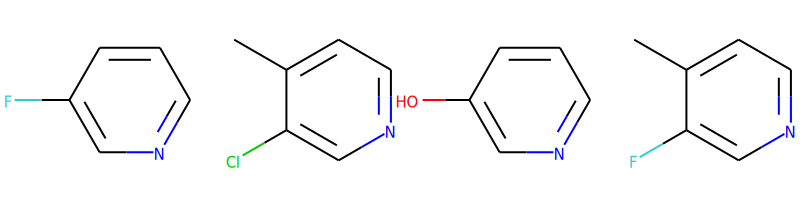

In [49]:
mols = [Chem.MolFromSmiles(smi) for smi in 'c1c(F)cccn1 c1c(Cl)c(C)ccn1 c1c(O)cccn1 c1c(F)c(C)ccn1'.split()]
Draw.MolsToGridImage(mols,molsPerRow=4)

In [64]:
scaffold = Chem.MolFromSmiles('c1ccccn1')

In [65]:
rgd = rdRGroupDecomposition.RGroupDecomposition(scaffold)
for m in mols:
    rgd.Add(m)
rgd.Process()

True

In [52]:
rgd.GetRGroupsAsColumns(asSmiles=True)

{'Core': ['c1cc([*:1])c([*:2])cn1',
  'c1cc([*:1])c([*:2])cn1',
  'c1cc([*:1])c([*:2])cn1',
  'c1cc([*:1])c([*:2])cn1'],
 'R1': ['[H][*:1]', '[H]C([H])([H])[*:1]', '[H][*:1]', '[H]C([H])([H])[*:1]'],
 'R2': ['F[*:2]', 'Cl[*:2]', '[H]O[*:2]', 'F[*:2]']}

In [59]:
scaffold = Chem.MolFromSmiles('c1c([*:8])cc([*:10])cn1')
params = rdRGroupDecomposition.RGroupDecompositionParameters()
#rdRGroupDecomposition.RGroupDecompositionParameters.onlyMatchAtRGroups
rgd = rdRGroupDecomposition.RGroupDecomposition(scaffold)
for m in mols:
    rgd.Add(m)
rgd.Process()
rgd.GetRGroupsAsColumns(asSmiles=True)

{'Core': ['c1ncc([*:10])c([*:1])c1[*:8]',
  'c1ncc([*:10])c([*:1])c1[*:8]',
  'c1ncc([*:10])c([*:1])c1[*:8]',
  'c1ncc([*:10])c([*:1])c1[*:8]'],
 'R1': ['[H][*:1]', '[H]C([H])([H])[*:1]', '[H][*:1]', '[H]C([H])([H])[*:1]'],
 'R10': ['', '', '', ''],
 'R8': ['F[*:8]', 'Cl[*:8]', '[H]O[*:8]', 'F[*:8]']}

,Core,R1,R10,R8
0,,,,
1,,,,
2,,,,
3,,,,

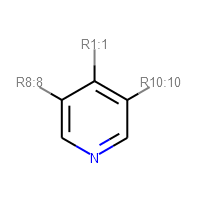
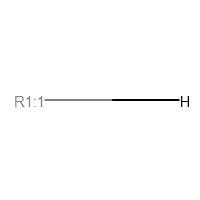
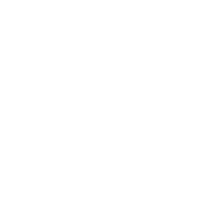
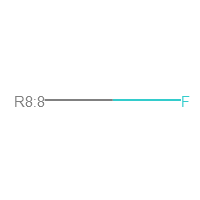
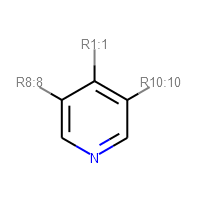
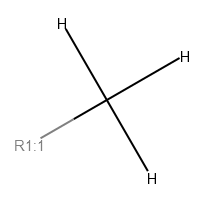
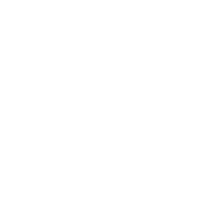
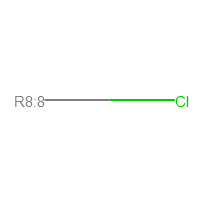
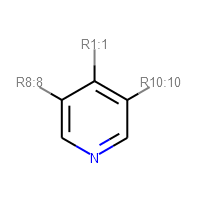
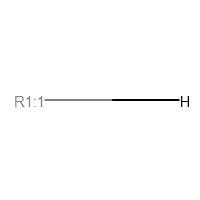
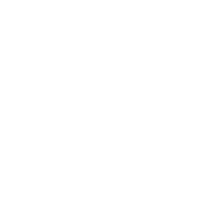
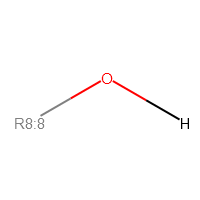
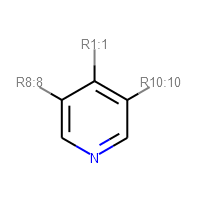
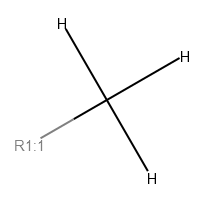
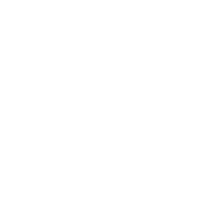
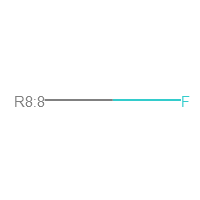

In [60]:
groups = rgd.GetRGroupsAsColumns()
df = pd.DataFrame(groups)
PandasTools.ChangeMoleculeRendering(df)
df

In [61]:
def groups_to_df(groups,mols,include_core=False):
    cols = ['Mol']+list(groups.keys())
    if not include_core:
        cols.remove('Core')
        del groups['Core']
    groups['Mol'] = mols
    frame = pd.DataFrame(groups,columns=cols)
    PandasTools.ChangeMoleculeRendering(frame)
    return frame

In [66]:
rgd = rdRGroupDecomposition.RGroupDecomposition(scaffold)
for m in mols:
    rgd.Add(m)
rgd.Process()
rgd.GetRGroupsAsColumns(asSmiles=True)

{'Core': ['c1cc([*:1])c([*:2])cn1',
  'c1cc([*:1])c([*:2])cn1',
  'c1cc([*:1])c([*:2])cn1',
  'c1cc([*:1])c([*:2])cn1'],
 'R1': ['[H][*:1]', '[H]C([H])([H])[*:1]', '[H][*:1]', '[H]C([H])([H])[*:1]'],
 'R2': ['F[*:2]', 'Cl[*:2]', '[H]O[*:2]', 'F[*:2]']}

,Mol,R1,R2
0,,,
1,,,
2,,,
3,,,

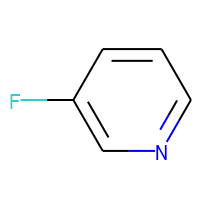
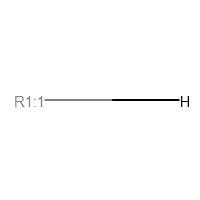
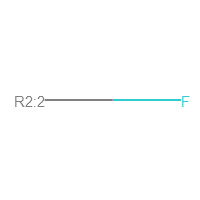
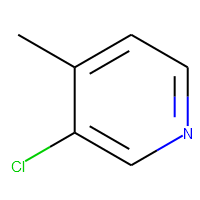
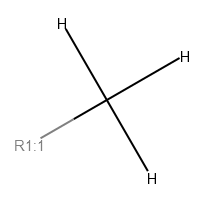
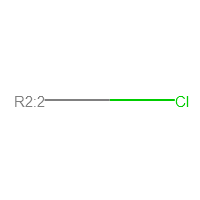
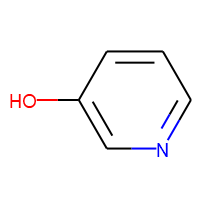
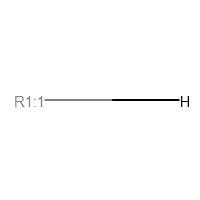
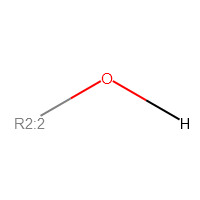
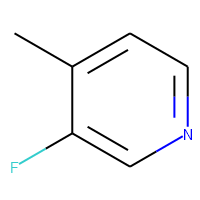
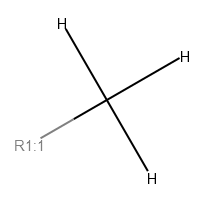
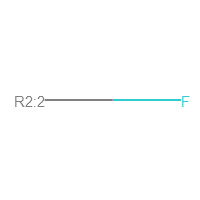

In [67]:
groups = rgd.GetRGroupsAsColumns()
groups_to_df(groups,mols)

,Mol,R1,R2
0,,,
1,,,
2,,,
3,,,

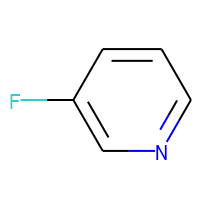
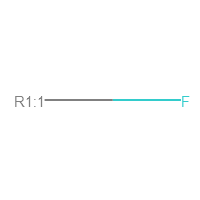
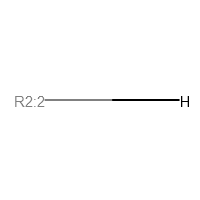
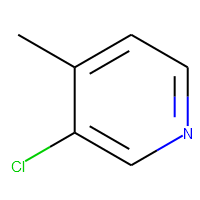
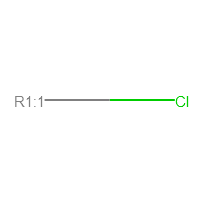
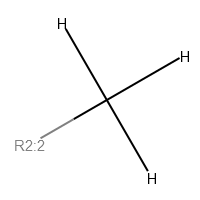
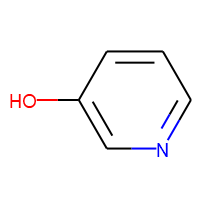
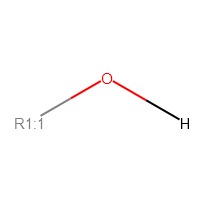
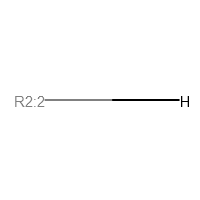
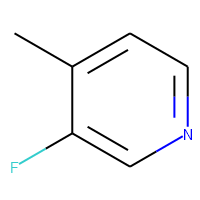
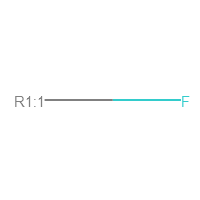
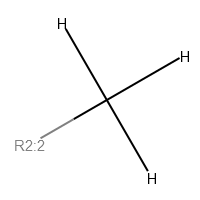

In [68]:
scaffold = Chem.MolFromSmiles('c1c([*:1])c([*:2])ccn1')
rgd = rdRGroupDecomposition.RGroupDecomposition(scaffold)
for m in mols:
    rgd.Add(m)
rgd.Process()
groups = rgd.GetRGroupsAsColumns()
groups_to_df(groups,mols)

What happens if there are small variations in the scaffold within the series, something that we see all the time in med chem work?

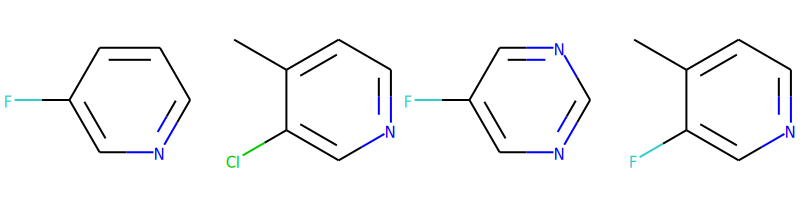

In [78]:
mols = [Chem.MolFromSmiles(smi) for smi in 'c1c(F)cccn1 c1c(Cl)c(C)ccn1 c1c(F)cncn1 c1c(F)c(C)ccn1'.split()]
Draw.MolsToGridImage(mols,molsPerRow=4)

In [79]:
scaffold = Chem.MolFromSmiles('c1c([*:1])c([*:2])ccn1')
rgd = rdRGroupDecomposition.RGroupDecomposition(scaffold)
for m in mols:
    rgd.Add(m)
rgd.Process()
rgd.GetRGroupsAsColumns(asSmiles=True)

{'Core': ['c1cc([*:2])c([*:1])cn1',
  'c1cc([*:2])c([*:1])cn1',
  'c1cc([*:2])c([*:1])cn1'],
 'R1': ['F[*:1]', 'Cl[*:1]', 'F[*:1]'],
 'R2': ['[H][*:2]', '[H]C([H])([H])[*:2]', '[H]C([H])([H])[*:2]']}

In [80]:
rgd.GetRGroupsAsRows(asSmiles=True)

[{'Core': 'c1cc([*:2])c([*:1])cn1', 'R1': 'F[*:1]', 'R2': '[H][*:2]'},
 {'Core': 'c1cc([*:2])c([*:1])cn1',
  'R1': 'Cl[*:1]',
  'R2': '[H]C([H])([H])[*:2]'},
 {'Core': 'c1cc([*:2])c([*:1])cn1',
  'R1': 'F[*:1]',
  'R2': '[H]C([H])([H])[*:2]'}]

You can see that now we only get three results, the third molecule didn't end up in the output.
Sometimes this is ok, but in cases like this it would be great if that molecule were also included in the R-group decomposition. 

One solution to this is to provide two different scaffolds:

In [71]:
scaffold = Chem.MolFromSmiles('c1c([*:12])c([*:20])ccn1')
scaffold2 = Chem.MolFromSmiles('c1c([*:12])c([*:20])ncn1')
rgd = rdRGroupDecomposition.RGroupDecomposition([scaffold,scaffold2])
for m in mols:
    rgd.Add(m)
rgd.Process()
rgd.GetRGroupsAsColumns(asSmiles=True)

{'Core': ['c1cc([*:20])c([*:12])cn1',
  'c1cc([*:20])c([*:12])cn1',
  'c1ncc([*:12])c([*:20])n1',
  'c1cc([*:20])c([*:12])cn1'],
 'R12': ['F[*:12]', 'Cl[*:12]', 'F[*:12]', 'F[*:12]'],
 'R20': ['[H][*:20]',
  '[H]C([H])([H])[*:20]',
  '[H][*:20]',
  '[H]C([H])([H])[*:20]']}

Another is provide the scaffold as SMARTS and treat the variability point itself as one of the R groups:

In [73]:
sma_scaffold = Chem.MolFromSmarts('c1c([*:14])c([*:28])*cn1')
rgd = rdRGroupDecomposition.RGroupDecomposition(sma_scaffold)
for m in mols:
    rgd.Add(m)
rgd.Process()
rgd.GetRGroupsAsColumns(asSmiles=True)

{'Core': ['c1nc[*:1]c([*:28])c1[*:14]',
  'c1nc[*:1]c([*:28])c1[*:14]',
  'c1nc[*:1]c([*:28])c1[*:14]',
  'c1nc[*:1]c([*:28])c1[*:14]'],
 'R1': ['[H]c(:[*:1]):[*:1]',
  'Clc(:[*:1]):[*:1]',
  'n(:[*:1]):[*:1]',
  '[H]c(:[*:1]):[*:1]'],
 'R14': ['F[*:14]', '[H][*:14]', 'F[*:14]', 'F[*:14]'],
 'R28': ['[H][*:28]',
  '[H]C([H])([H])[*:28]',
  '[H][*:28]',
  '[H]C([H])([H])[*:28]']}

In [74]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
def rgd_to_pandas(scaffolds,mols,redraw_mols=False,include_core=False):
    if not isinstance(scaffolds,list) and not isinstance(scaffolds,tuple):
        scaffolds = [scaffolds]
    params = rdRGroupDecomposition.RGroupDecompositionParameters()
    params.removeAllHydrogenRGroups=True
    groups,unmatched = rdRGroupDecomposition.RGroupDecompose(scaffolds,mols,options=params,asRows=False)
    for k,vl in groups.items():
        if k=='Core':
            continue
        for i,v in enumerate(vl):
            vl[i] = Chem.RemoveHs(v)
            if redraw_mols:
                rdDepictor.Compute2DCoords(vl[i])
    
    matched_mols = [x for i,x in enumerate(mols) if i not in unmatched]
    cols = ['Mol']+list(groups.keys())
    if not include_core:
        cols.remove('Core')
        del groups['Core']
    groups['Mol'] = matched_mols
    frame = pd.DataFrame(groups,columns=cols)
    PandasTools.ChangeMoleculeRendering(frame)
    return frame


In [40]:
import pandas as pd
from rdkit.Chem import PandasTools

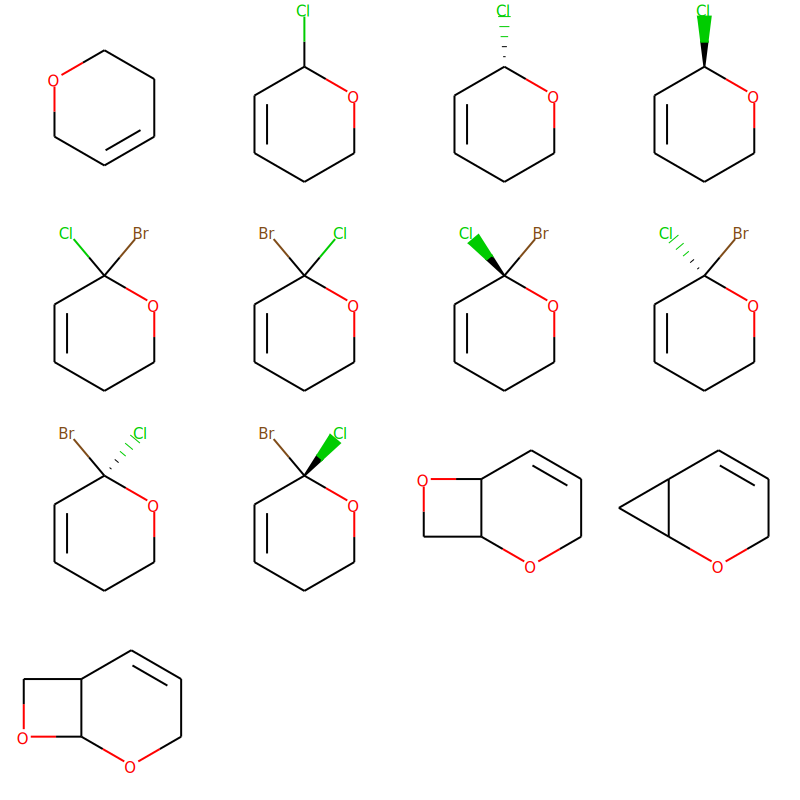

In [76]:
mols = [x for x in Chem.SDMolSupplier('../data/rgd_chiral.sdf')]
Draw.MolsToGridImage(mols,molsPerRow=4)

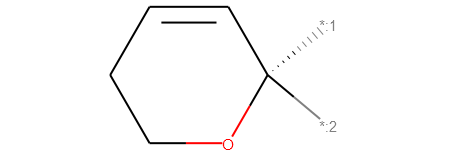

In [75]:
scaffold = Chem.MolFromSmiles('[*:1]C1([*:2])OCCC=C1')
chiral_scaffold = Chem.MolFromSmiles('[*:1][C@]1([*:2])OCCC=C1')
chiral_scaffold

,Mol,Core,R1,R2,R3,R4
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,
5,,,,,,
6,,,,,,
7,,,,,,
8,,,,,,
9,,,,,,

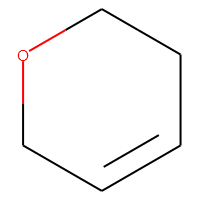
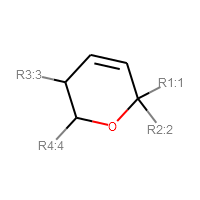
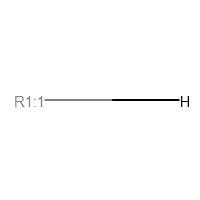
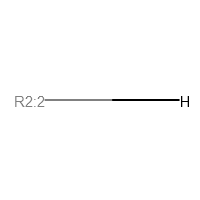
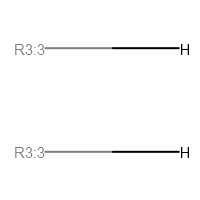
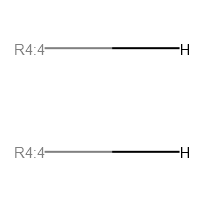
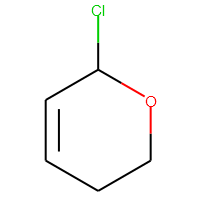
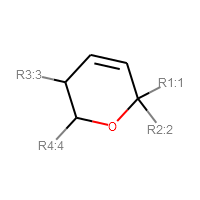
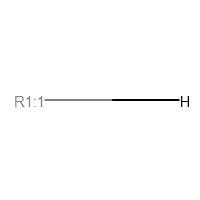
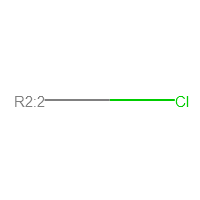
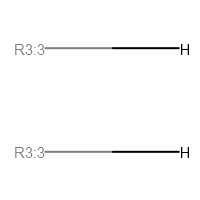
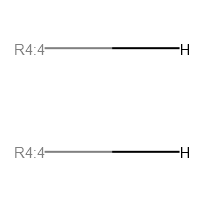
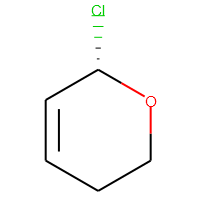
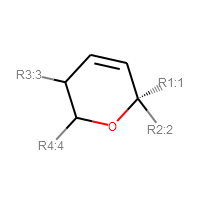
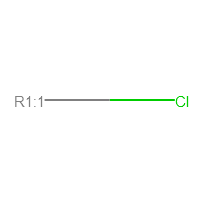
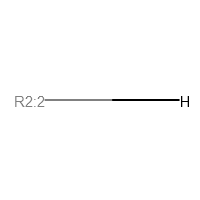
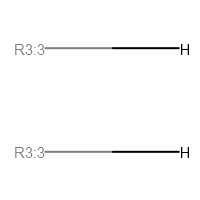
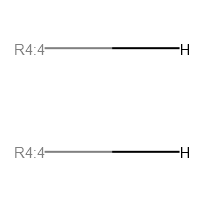
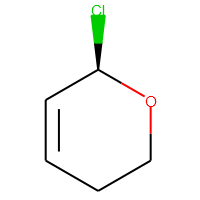
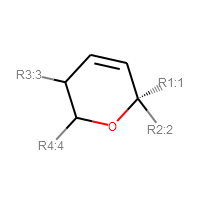
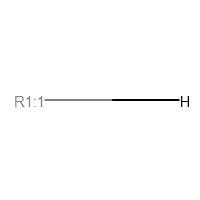
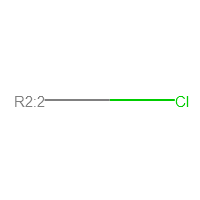
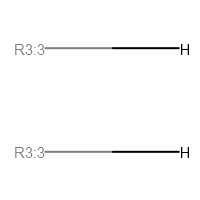
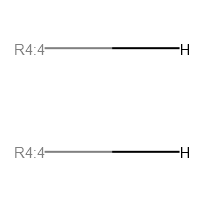
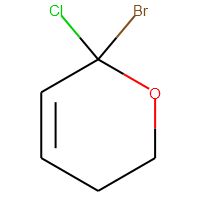
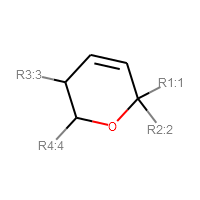
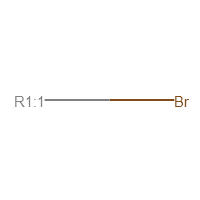
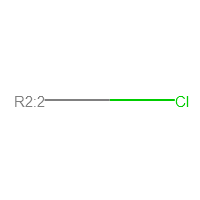
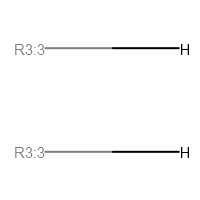
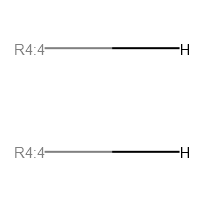
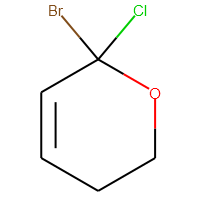
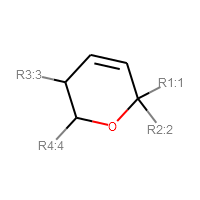
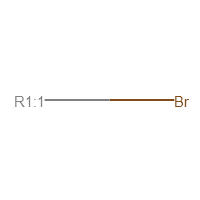
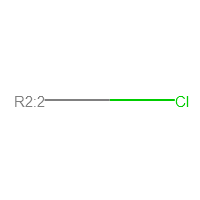
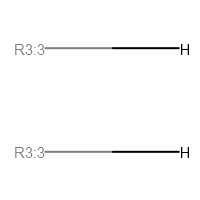
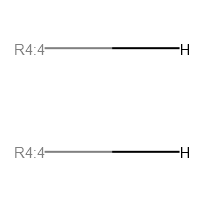
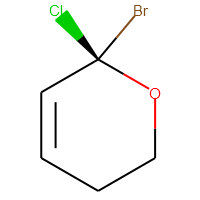
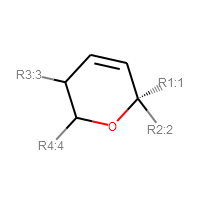
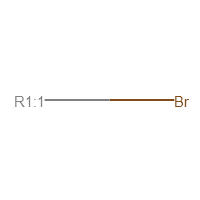
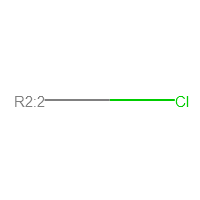
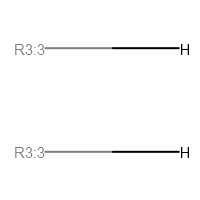
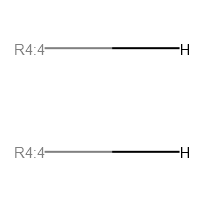
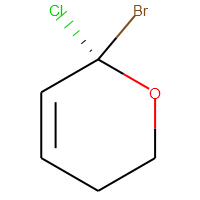
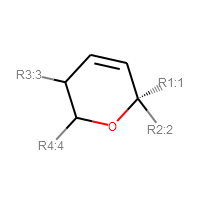
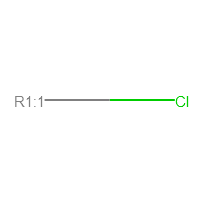
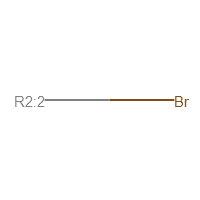
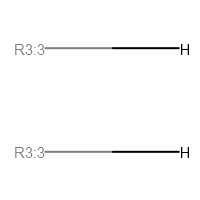
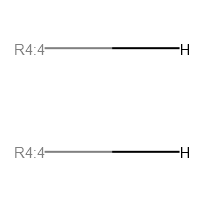
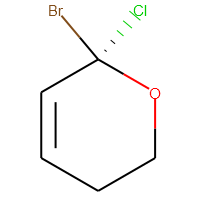
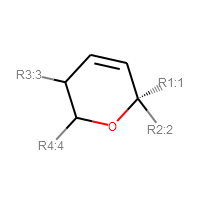
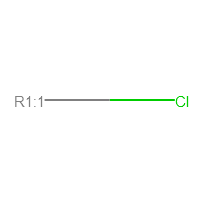
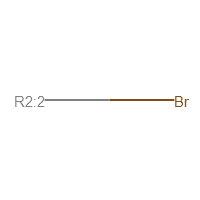
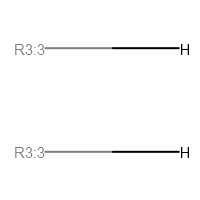
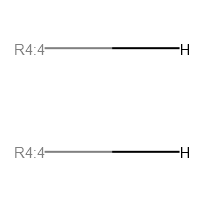
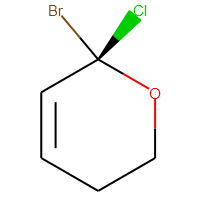
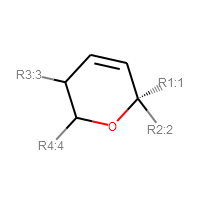
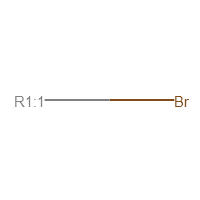
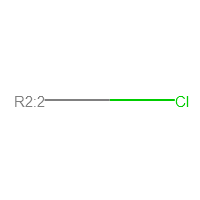
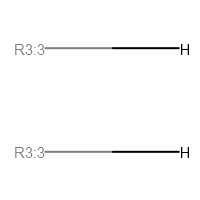
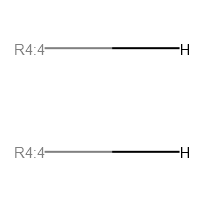
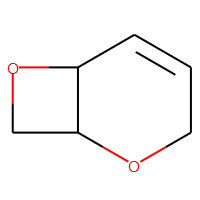
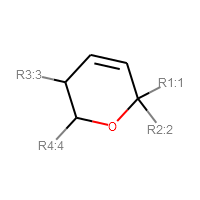
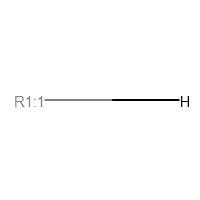
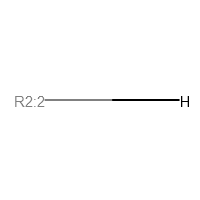
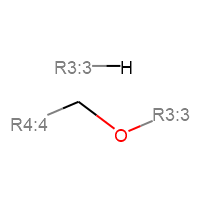
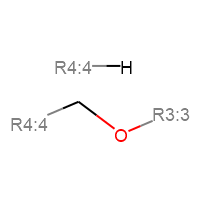
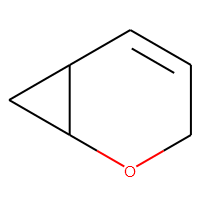
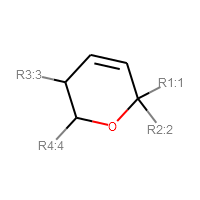
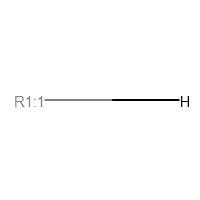
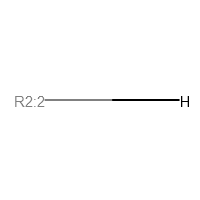
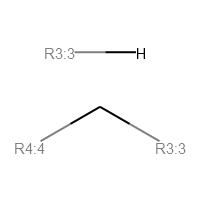
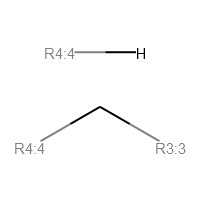
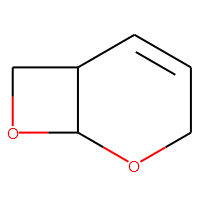
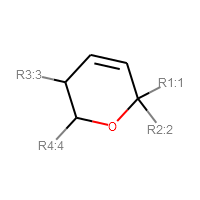
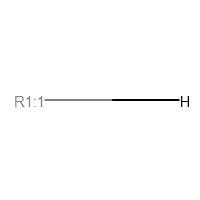
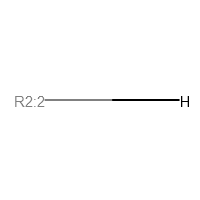
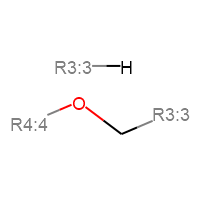
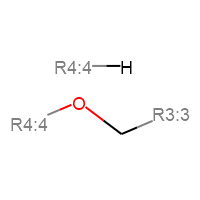

In [77]:
df = rgd_to_pandas([chiral_scaffold,scaffold],mols,redraw_mols=True,include_core=True)
df

In [45]:
rgd = rdRGroupDecomposition.RGroupDecomposition(scaffold)
nomatches = []
for i,m in enumerate(mols):
    if rgd.Add(m) < 0:
        nomatches.append(i)    
rgd.Process()
print(nomatches)

[]


In [46]:
chiral_rgd = rdRGroupDecomposition.RGroupDecomposition(chiral_scaffold)
chiral_nomatches = []
for i,m in enumerate(mols):
    if chiral_rgd.Add(m) < 0:
        chiral_nomatches.append(i)
chiral_rgd.Process()
print(chiral_nomatches)

[0, 1, 4, 5, 10, 11, 12]


,Core,R1,R2,R3,R4
0,,,,,
1,,,,,
2,,,,,
3,,,,,
4,,,,,
5,,,,,
6,,,,,
7,,,,,
8,,,,,
9,,,,,

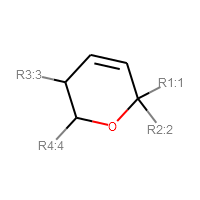
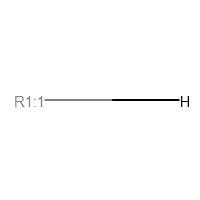
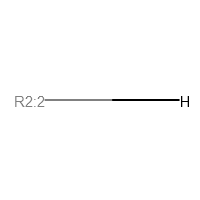
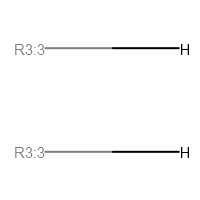
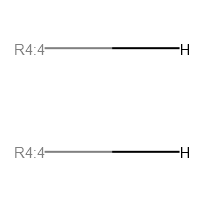
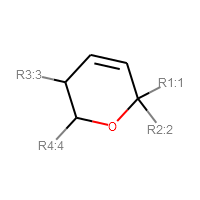
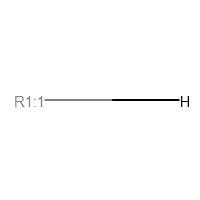
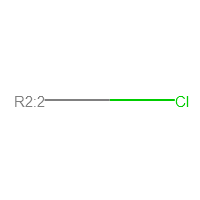
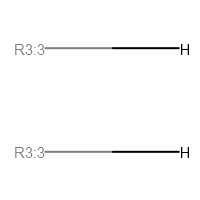
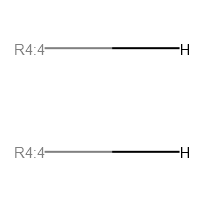
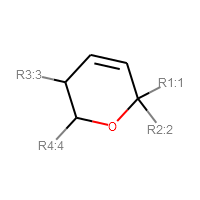
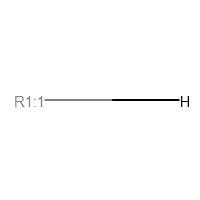
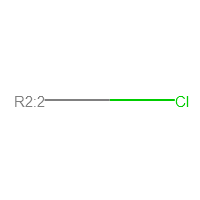
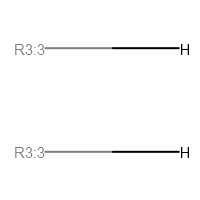
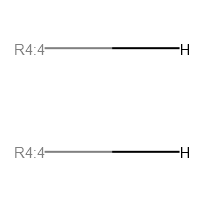
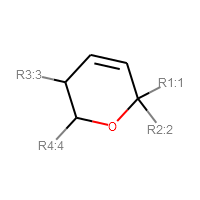
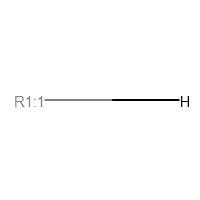
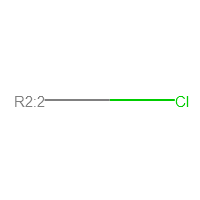
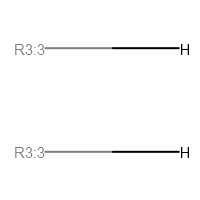
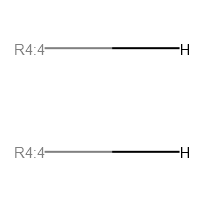
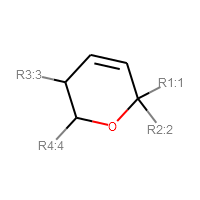
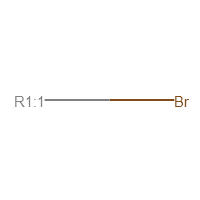
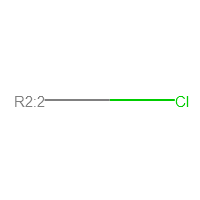
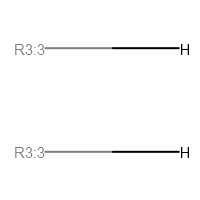
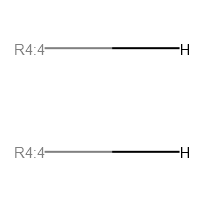
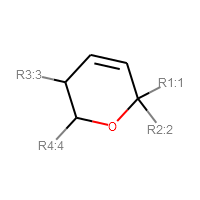
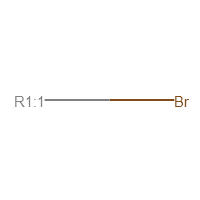
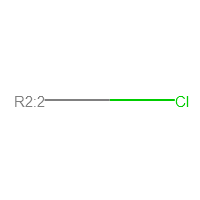
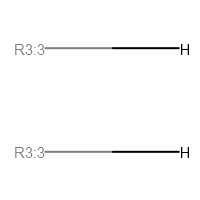
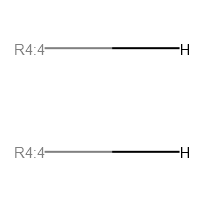
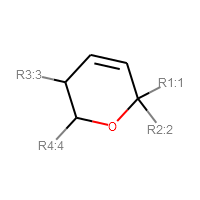
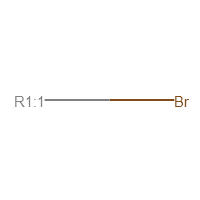
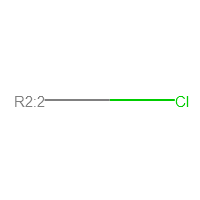
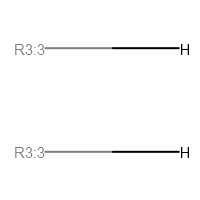
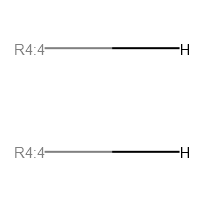
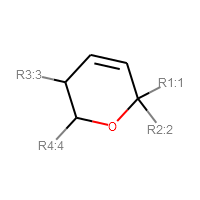
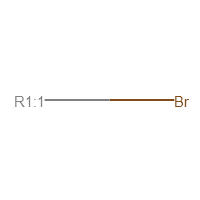
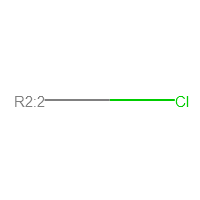
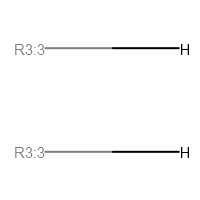
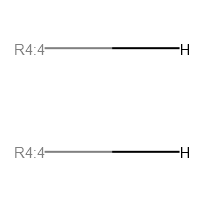
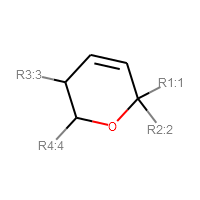
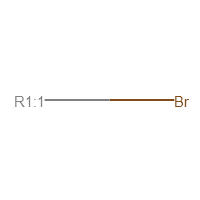
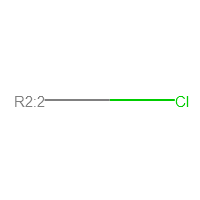
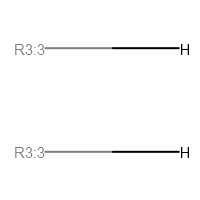
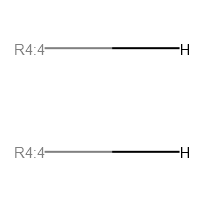
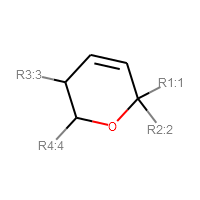
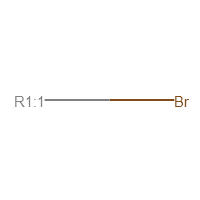
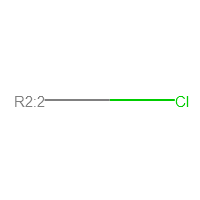
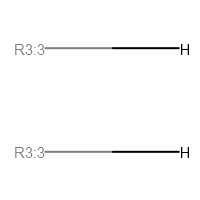
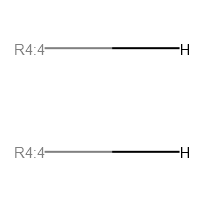
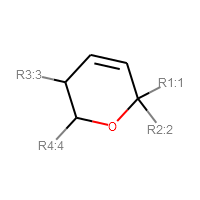
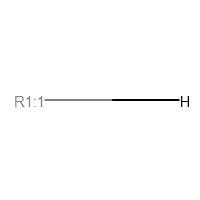
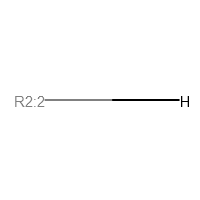
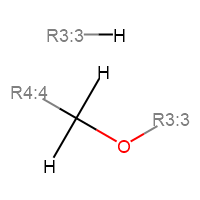
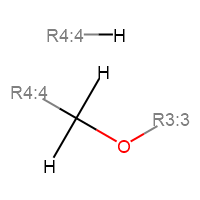
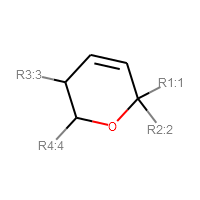
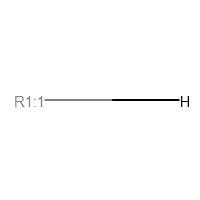
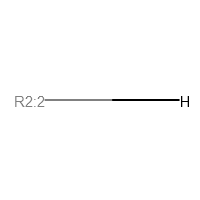
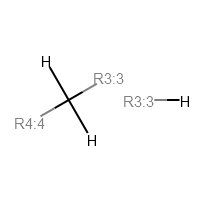
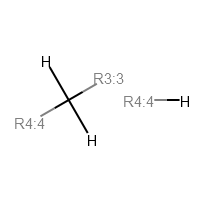
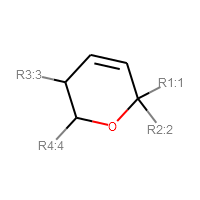
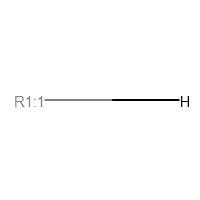
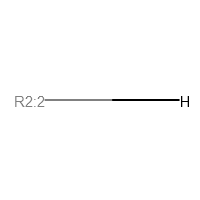
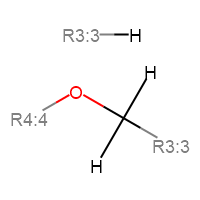
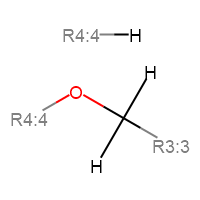

In [47]:
groups = rgd.GetRGroupsAsColumns()
# we shouldn't need to do this, but there's a bug in the coordinate addition for AddHs on 2D mols
for k,vl in groups.items():
   for v in vl:
       rdDepictor.Compute2DCoords(v)
frame = pd.DataFrame(groups)
PandasTools.ChangeMoleculeRendering(frame)
frame

,mol,Core,R1,R2,R3,R4
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,
5,,,,,,
6,,,,,,
7,,,,,,
8,,,,,,
9,,,,,,

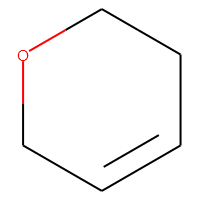
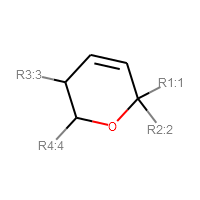
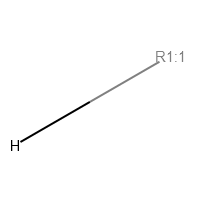
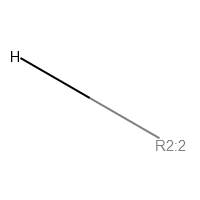
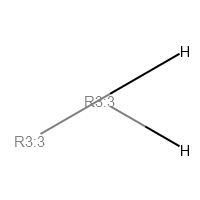
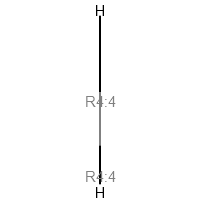
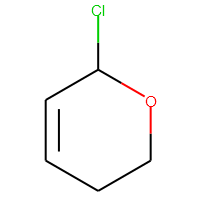
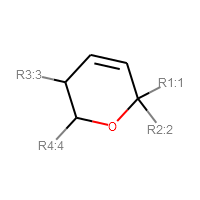
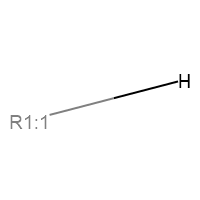
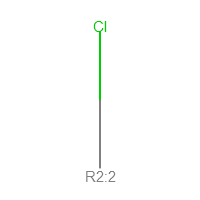
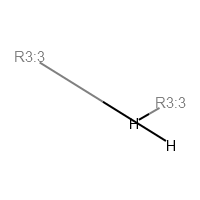
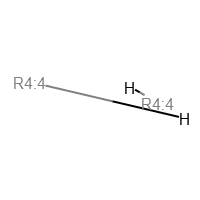
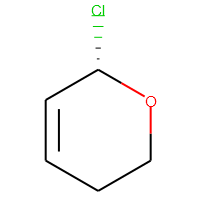
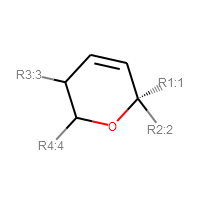
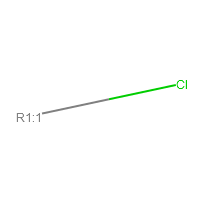
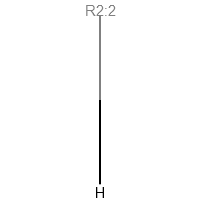
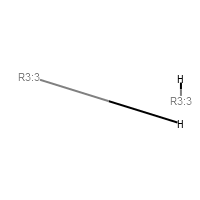
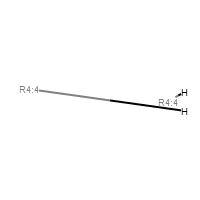
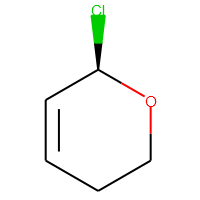
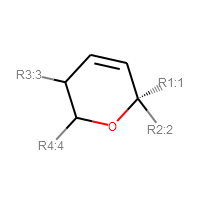
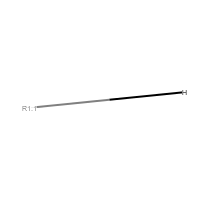
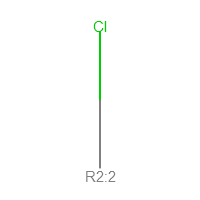
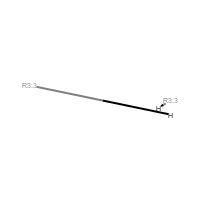
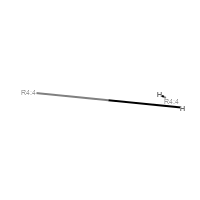
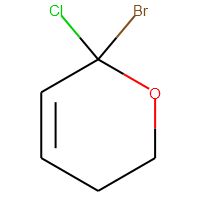
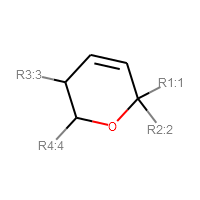
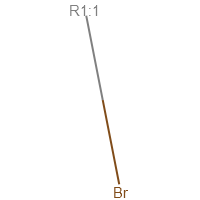
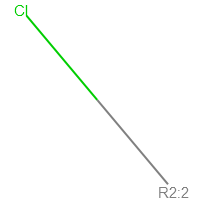
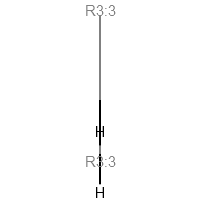
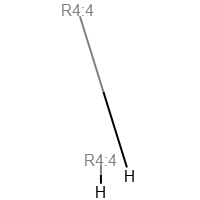
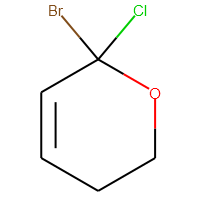
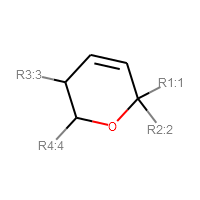
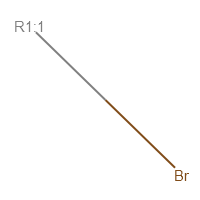
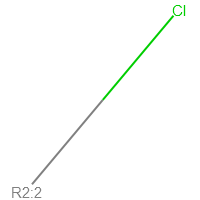
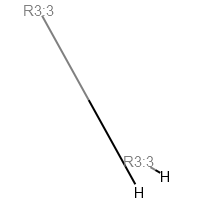
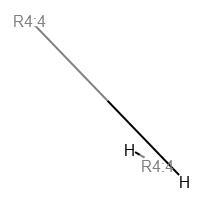
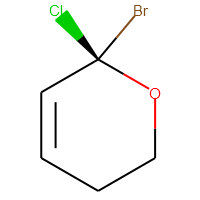
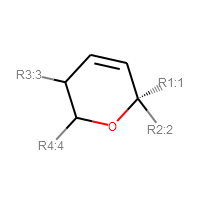
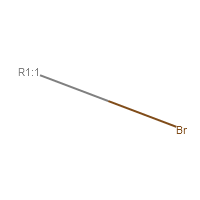
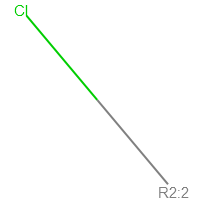
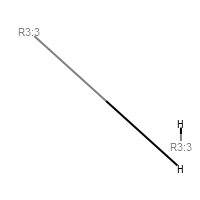
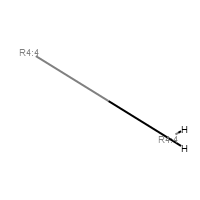
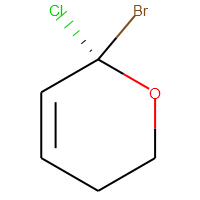
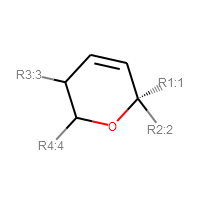
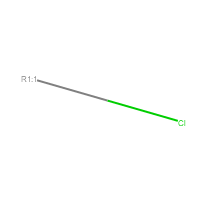
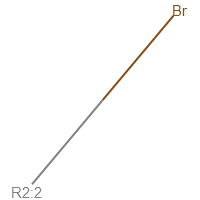
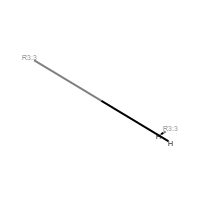
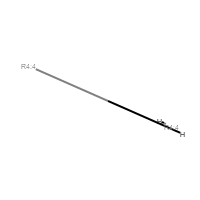
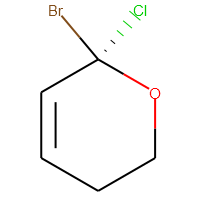
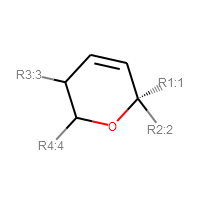
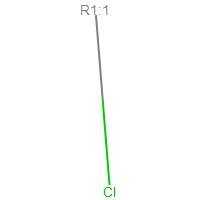
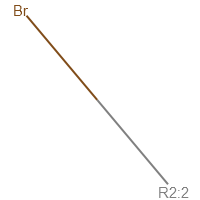
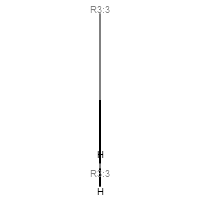
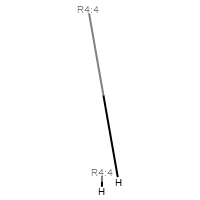
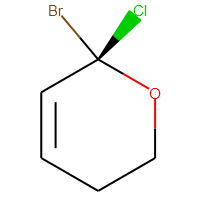
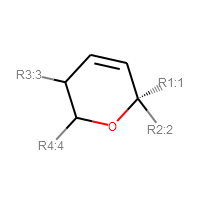
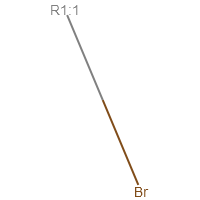
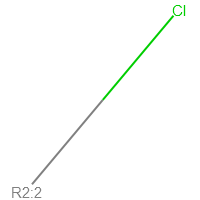
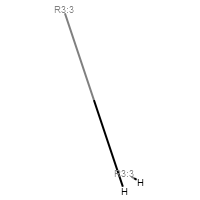
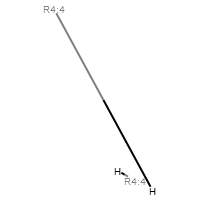
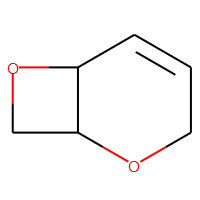
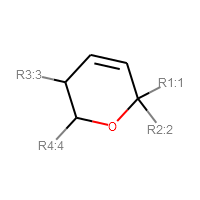
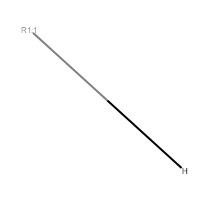
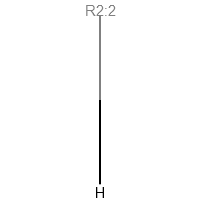
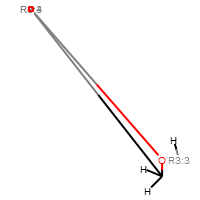
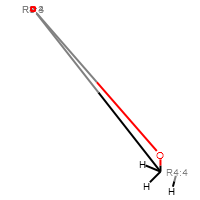
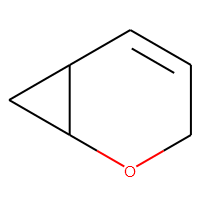
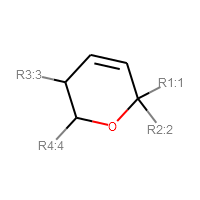
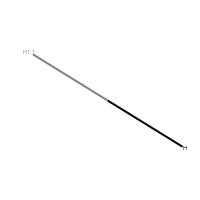
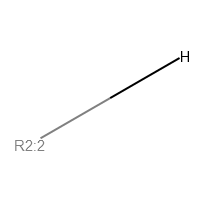
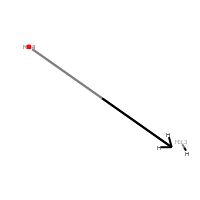
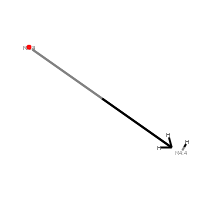
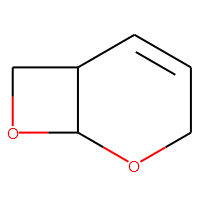
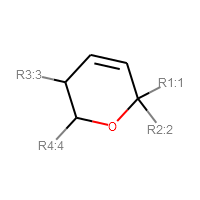
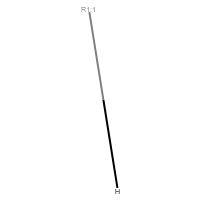
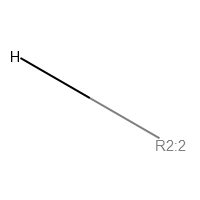
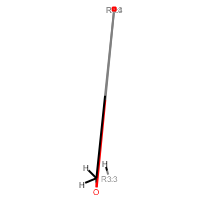
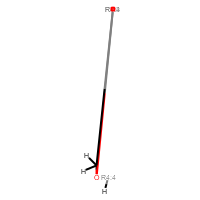

In [24]:
groups,unmatched = rdRGroupDecomposition.RGroupDecompose([chiral_scaffold,scaffold],mols,asRows=False)
# we shouldn't need to do this, but there's a bug in the coordinate addition for AddHs on 2D mols
# for k,vl in groups.items():
#     for v in vl:
#         rdDepictor.Compute2DCoords(v)
frame = pd.DataFrame(groups)
# add a column with the matched molecules to the frame
matched_mols = [x for i,x in enumerate(mols) if i not in unmatched]
cols = ['mol']+list(frame.columns)
frame['mol'] = matched_mols
# and reorder the columns of the frame so that molecule comes at the front:
frame = frame[cols]

PandasTools.ChangeMoleculeRendering(frame)
frame

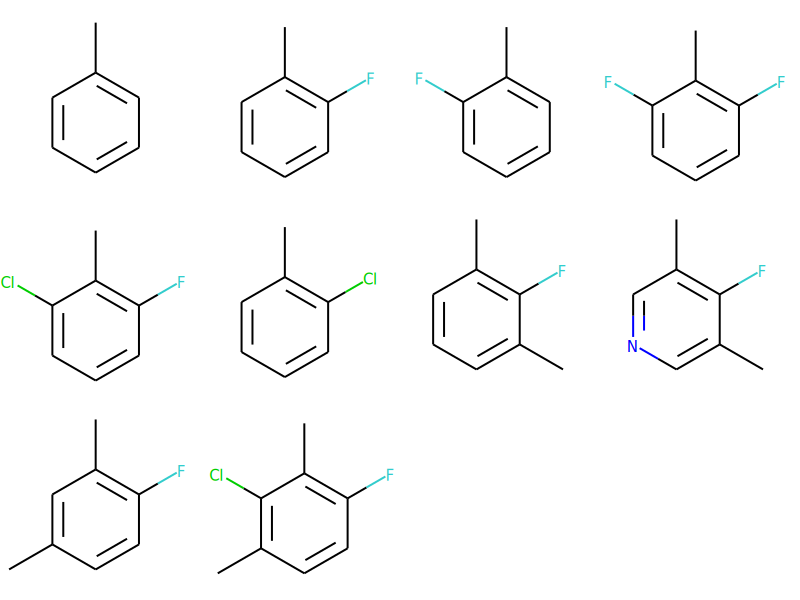

In [81]:
mols = [x for x in Chem.SDMolSupplier('../data/rgd_symm.sdf')]
Draw.MolsToGridImage(mols,molsPerRow=4)

,Mol,R1,R2,R3
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,
8,,,,

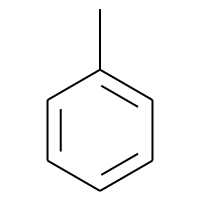
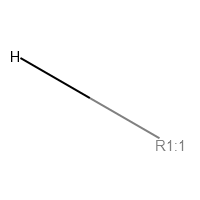
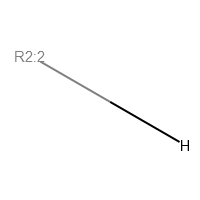
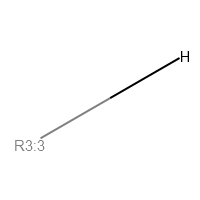
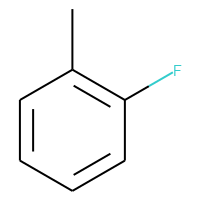
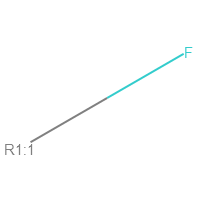
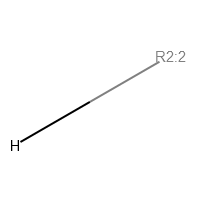
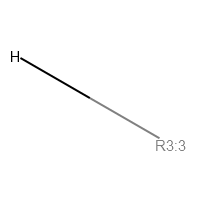
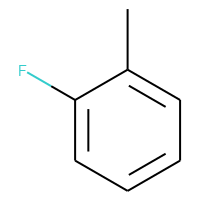
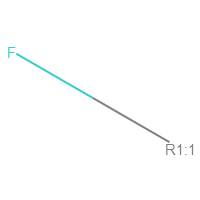
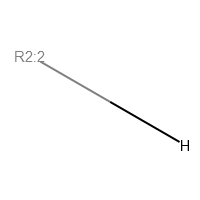
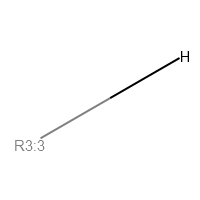
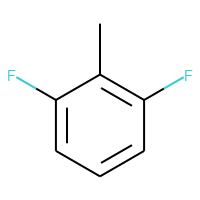
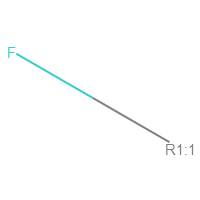
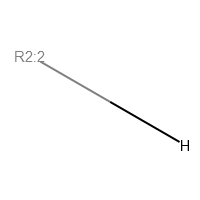
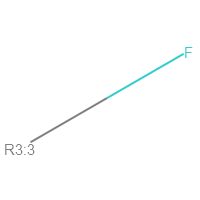
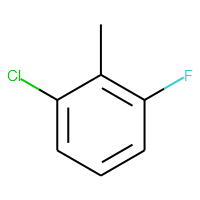
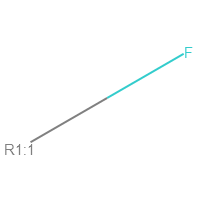
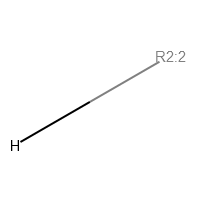
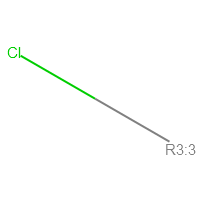
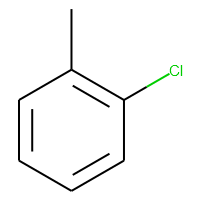
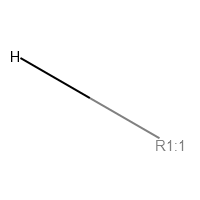
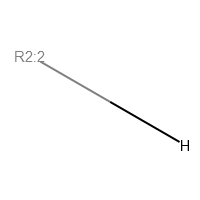
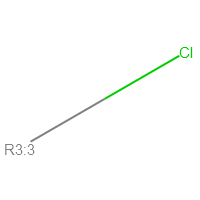
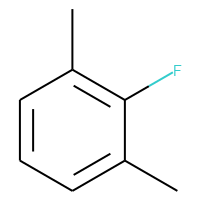
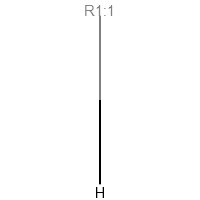
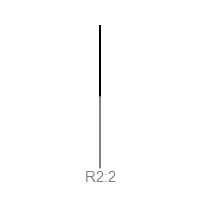
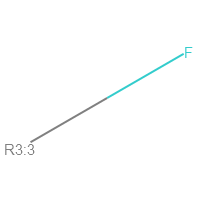
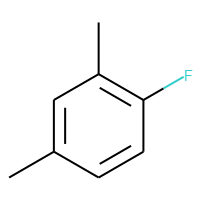
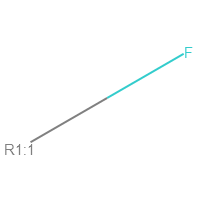
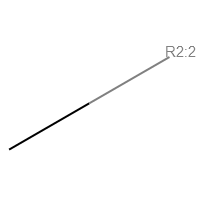
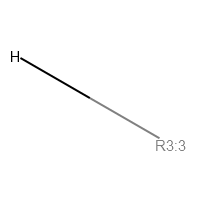
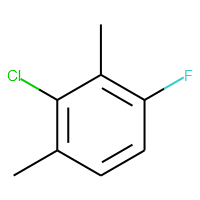
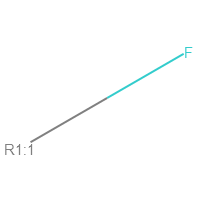
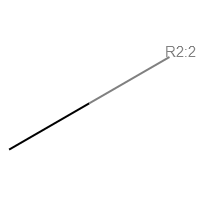
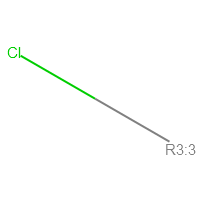

In [82]:
scaffold = Chem.MolFromSmiles('c1ccccc1C')

df = rgd_to_pandas(scaffold,mols)
df

In [27]:
rgd = rdRGroupDecomposition.RGroupDecomposition(scaffold)
nomatches = []
for i,m in enumerate(mols):
    if rgd.Add(m) < 0:
        nomatches.append(i)    
rgd.Process()
matched_mols = [x for i,x in enumerate(mols) if i not in nomatches]
print(nomatches)

[7]


,mol,R1,R2,R3
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,
8,,,,

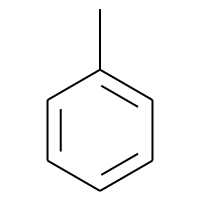
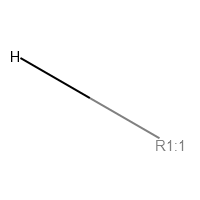
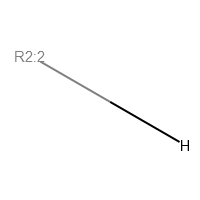
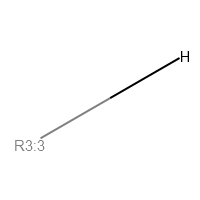
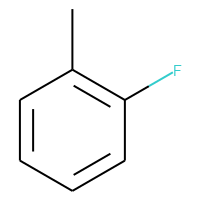
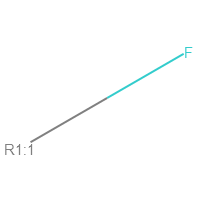
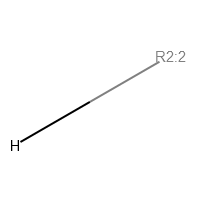
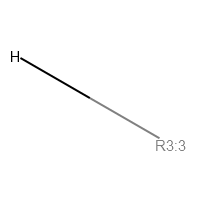
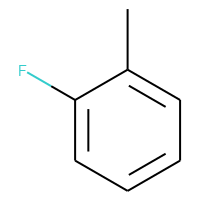
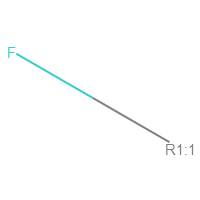
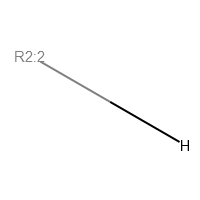
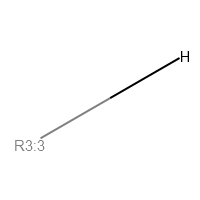
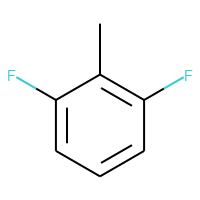
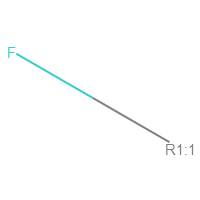
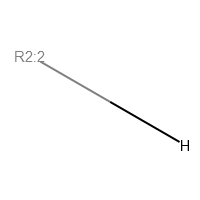
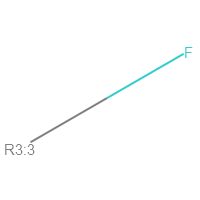
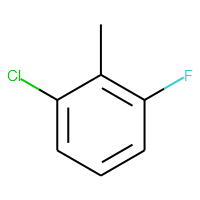
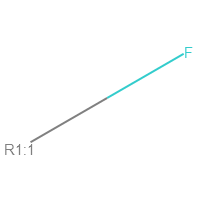
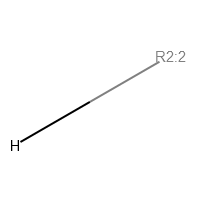
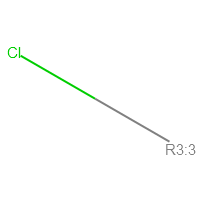
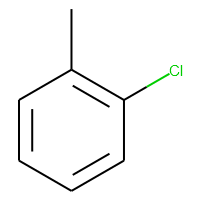
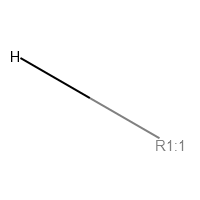
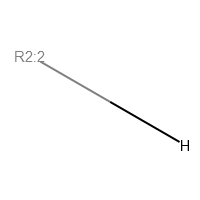
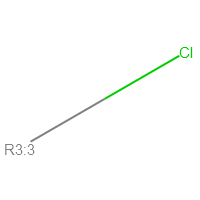
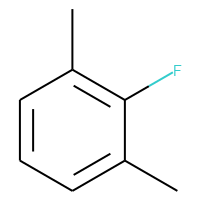
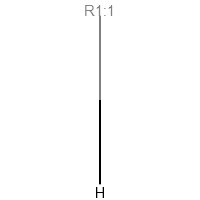
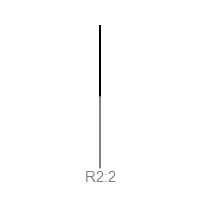
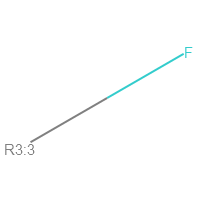
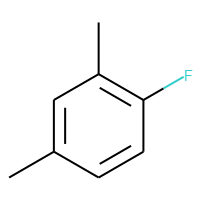
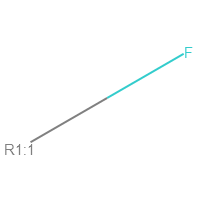
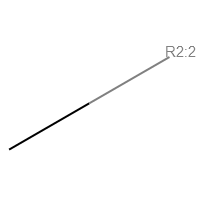
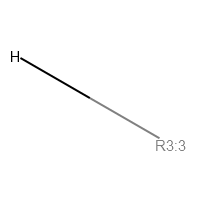
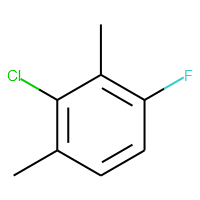
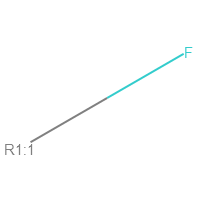
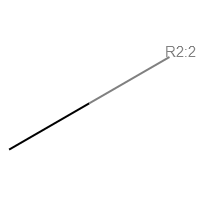
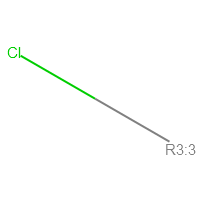

In [28]:
groups = rgd.GetRGroupsAsColumns()
# Generate fresh 2D coordinates for everything.
# for k,vl in groups.items():
#     for v in vl:
#         rdDepictor.Compute2DCoords(v)
for k,vl in groups.items():
    if k=='Core':
        continue
    for i,v in enumerate(vl):
        vl[i] = Chem.RemoveHs(v)
frame = pd.DataFrame(groups)
cols = ['mol']+list(frame.columns)
cols.remove('Core')
frame['mol'] = matched_mols
frame = frame[cols]
PandasTools.ChangeMoleculeRendering(frame)
frame

,Core,R1,R2,R3
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,
8,,,,

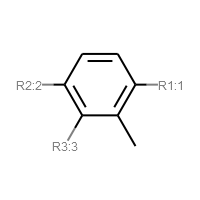
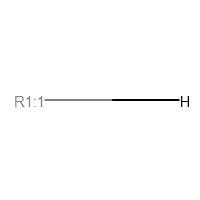
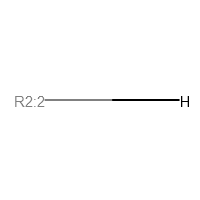
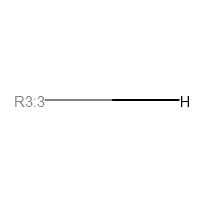
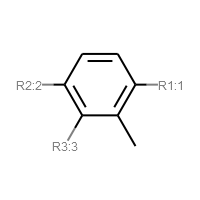
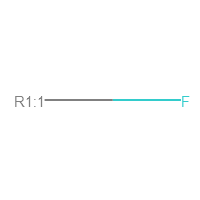
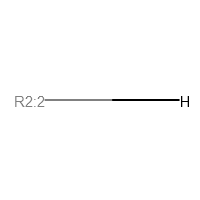
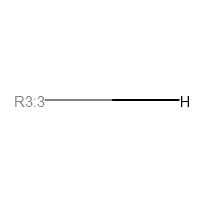
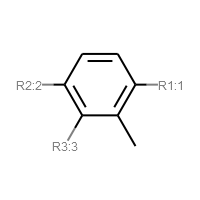
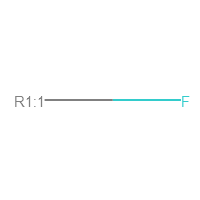
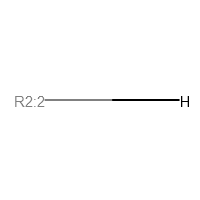
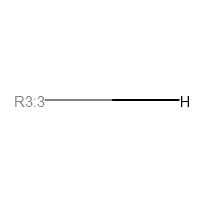
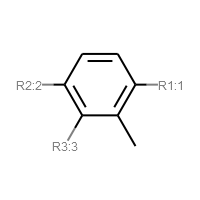
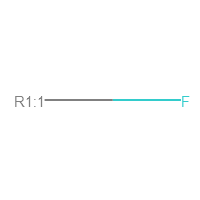
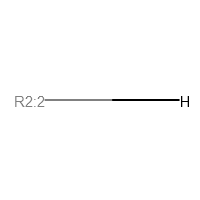
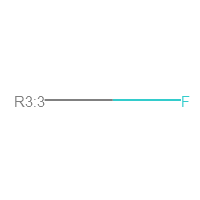
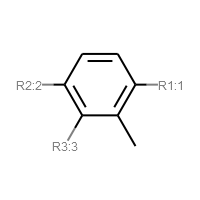
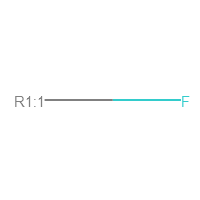
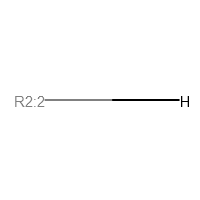
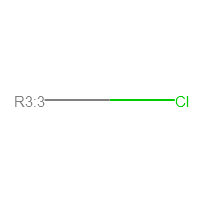
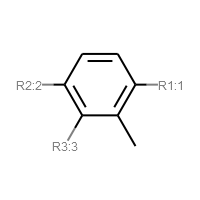
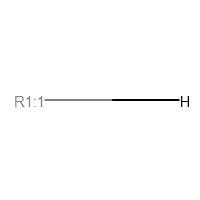
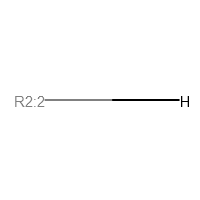
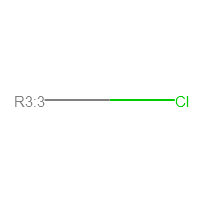
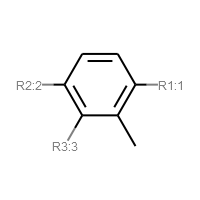
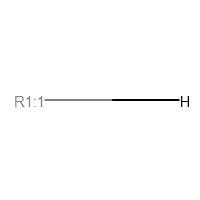
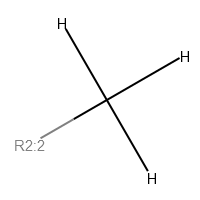
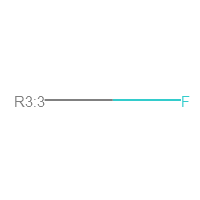
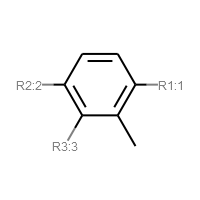
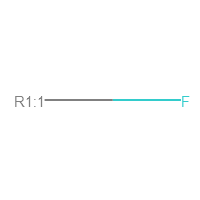
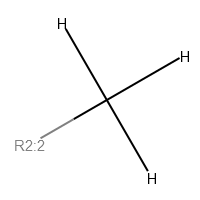
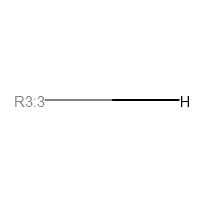
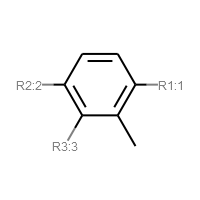
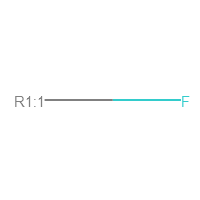
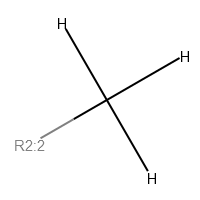
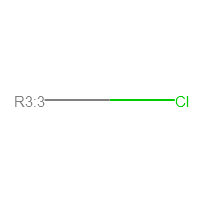

In [29]:
scaffold = Chem.MolFromSmiles('c1ccccc1C')
groups,_ = rdRGroupDecomposition.RGroupDecompose([scaffold],mols,asRows=False)
# we shouldn't need to do this, but there's a bug in the coordinate addition for AddHs on 2D mols
for k,vl in groups.items():
    for v in vl:
        rdDepictor.Compute2DCoords(v)
frame = pd.DataFrame(groups)
PandasTools.ChangeMoleculeRendering(frame)
frame

In [30]:
mols = [Chem.MolFromSmiles(smi) for smi in 'c1c(F)cccn1 c1c(Cl)c(C)ccn1 c1c(F)c(C)ccn1 c1c(F)cncn1'.split()]                                             
scaffold = Chem.MolFromSmiles('c1c([*:1])c([*:2])ccn1')                                                                                                  
scaffold2 = Chem.MolFromSmiles('c1c([*:1])c([*:2])ncn1')                                                                                                 
params = rdRGroupDecomposition.RGroupDecompositionParameters()                                                                                           
params.removeHydrogensPostMatch=True                                                                                                                     
rgd = rdRGroupDecomposition.RGroupDecomposition([scaffold,scaffold2])  
for m in mols:  
   rgd.Add(m)  
rgd.Process()  
rgd.GetRGroupsAsColumns(asSmiles=True)                                                                                                           


{'Core': ['c1cc([*:2])c([*:1])cn1',
  'c1cc([*:2])c([*:1])cn1',
  'c1cc([*:2])c([*:1])cn1',
  'c1ncc([*:1])c([*:2])n1'],
 'R1': ['F[*:1]', 'Cl[*:1]', 'F[*:1]', 'F[*:1]'],
 'R2': ['[H][*:2]', '[H]C([H])([H])[*:2]', '[H]C([H])([H])[*:2]', '[H][*:2]']}

In [31]:
mols = [Chem.MolFromSmiles(smi) for smi in (
    "C1CCNC(Cl)CC1", "C1CC(Cl)NCCC1", "C1CCNC(I)CC1", "C1CC(I)NCCC1",
    "C1CCSC(Cl)CC1", "C1CC(Cl)SCCC1", "C1CCSC(I)CC1", "C1CC(I)SCCC1",
    "C1CCOC(Cl)CC1", "C1CC(Cl)OCCC1", "C1CCOC(I)CC1", "C1CC(I)OCCC1")]                                             
scaffolds = [Chem.MolFromSmarts(x) for x in ("C1CCNCCC1","C1CCOCCC1","C1CCSCCC1")]                                                                                                  
rgd = rdRGroupDecomposition.RGroupDecomposition(scaffolds)  
for m in mols:  
   rgd.Add(m)  
rgd.Process()  
rgd.GetRGroupsAsColumns(asSmiles=True)                                                                                                           


{'Core': ['C1CCNC([*:1])CC1',
  'C1CCNC([*:1])CC1',
  'C1CCNC([*:1])CC1',
  'C1CCNC([*:1])CC1',
  'C1CCSC([*:1])CC1',
  'C1CCSC([*:1])CC1',
  'C1CCSC([*:1])CC1',
  'C1CCSC([*:1])CC1',
  'C1CCOC([*:1])CC1',
  'C1CCOC([*:1])CC1',
  'C1CCOC([*:1])CC1',
  'C1CCOC([*:1])CC1'],
 'R1': ['Cl[*:1].[H][*:1]',
  'Cl[*:1].[H][*:1]',
  'I[*:1].[H][*:1]',
  'I[*:1].[H][*:1]',
  'Cl[*:1].[H][*:1]',
  'Cl[*:1].[H][*:1]',
  'I[*:1].[H][*:1]',
  'I[*:1].[H][*:1]',
  'Cl[*:1].[H][*:1]',
  'Cl[*:1].[H][*:1]',
  'I[*:1].[H][*:1]',
  'I[*:1].[H][*:1]']}

In [32]:
m = Chem.MolFromSmiles('c1ccccc1*')
params = Chem.AdjustQueryParameters()
params.makeDummiesQueries=True
params.adjustDegree=False
m2 = Chem.AdjustQueryProperties(m)
for smi in ('c1ccccc1Cl','c1ccc(C)cc1Cl'):
    print(smi,Chem.MolFromSmiles(smi).HasSubstructMatch(m),Chem.MolFromSmiles(smi).HasSubstructMatch(m2))


c1ccccc1Cl False True
c1ccc(C)cc1Cl False False


In [33]:
Chem.MolToSmarts(Chem.AdjustQueryProperties(m,params))

'[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-*'